# Imports

In [1]:
%matplotlib inline
import sys
sys.path.insert(0, 'lib\\')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import Analyser
import researchpy as rp
import tqdm

# Read data

In [2]:
df = pd.read_csv('data\\Facebook_Ads.csv', encoding='ISO-8859-1')

# Functionality

In [4]:
# create recursive the next combination 
def kombination(events, field, level, outcomes):
    field[level] = (field[level] + 1) % outcomes[level]
    if field[level] == 0 and level + 1 < events:
        kombination(events, field, level + 1, outcomes)
    return field

In [ ]:
num = 100
events = 2
outcomes = [num, num]
tot = num*num
combo = [0,0]
combo_container = []
arr = [[0 for x in range(num)] for y in range(num)]
i = 0
tot_10perc = int(tot * 0.10)

In [42]:
 

while True:
    first_break_raw  = (combo[0])
    second_break_raw = (combo[1])
    first_break      = (combo[0]+1)*1000
    second_break     = (combo[1]+1)*1000
    #print(i+1, ". ", first_break, "-", second_break) 
    if (i+1)%tot_10perc == 0:
        print(i+1, "steps done of", tot, "in %", 100*float(i+1)/float(tot),"%")
    if first_break_raw < second_break_raw:
        temp = df
        bins = [first_break, second_break]
        group_names = [i for i in range(0, len(bins) - 1)]
        temp['Salary_cat'] = np.digitize(temp['Salary'], bins)
        results = np.array(rp.crosstab(temp['Clicked'], temp['Salary_cat'], test= 'chi-square')[1])[2][1]       
        arr[first_break_raw][second_break_raw] = results        
        combo_container.append([first_break,second_break,results])
    #else:
    #   arr[first_break_raw][second_break_raw] = 0.0
    combo = kombination(events, combo, 0, outcomes)   
    i = i+1
    if(i >= tot):  
        break  
    

1000 steps done of 10000 in % 10.0 %
2000 steps done of 10000 in % 20.0 %
3000 steps done of 10000 in % 30.0 %
4000 steps done of 10000 in % 40.0 %
5000 steps done of 10000 in % 50.0 %
6000 steps done of 10000 in % 60.0 %
7000 steps done of 10000 in % 70.0 %
8000 steps done of 10000 in % 80.0 %
9000 steps done of 10000 in % 90.0 %
10000 steps done of 10000 in % 100.0 %


In [82]:
combo_container_df

,0,1,2,combi
0,1000,2000,0.0449,1000-2000
1,1000,3000,0.0449,1000-3000
2,2000,3000,0.0449,2000-3000
3,1000,4000,0.0636,1000-4000
4,2000,4000,0.0636,2000-4000
...,...,...,...,...
4945,95000,100000,0.0517,95000-100000
4946,96000,100000,0.0447,96000-100000
4947,97000,100000,0.0633,97000-100000
4948,98000,100000,0.0447,98000-100000


In [64]:
combo_container_df = pd.DataFrame(combo_container)

In [78]:
combo_container_df['combi'] = combo_container_df[0].astype(str) + '-' + combo_container_df[1].astype(str)

In [88]:
combo_container_df = combo_container_df.sort_values(by=[0,1], ascending=True)

In [89]:
combo_container_df

,0,1,2,combi
0,1000,2000,0.0449,1000-2000
1,1000,3000,0.0449,1000-3000
3,1000,4000,0.0636,1000-4000
6,1000,5000,0.0636,1000-5000
10,1000,6000,0.0779,1000-6000
...,...,...,...,...
4849,97000,99000,0.0633,97000-99000
4947,97000,100000,0.0633,97000-100000
4850,98000,99000,0.0447,98000-99000
4948,98000,100000,0.0447,98000-100000


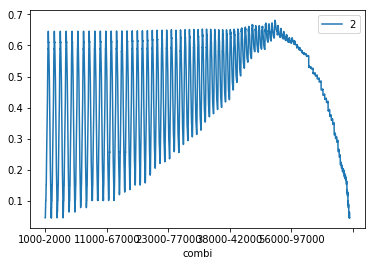

In [90]:
combo_container_df.plot(x='combi', y = 2)

In [63]:
pd.DataFrame(combo_container).sort_values(by=[2],ascending=False)


,0,1,2
1941,51000,63000,0.6812
1880,51000,62000,0.6797
2261,51000,68000,0.6767
2195,51000,67000,0.6755
2130,51000,66000,0.6753
...,...,...,...
4751,96000,98000,0.0447
4655,96000,97000,0.0447
4946,96000,100000,0.0447
4948,98000,100000,0.0447


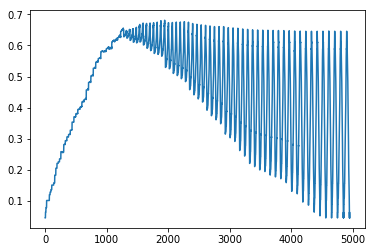

In [45]:
combo_container_df[2].plot()

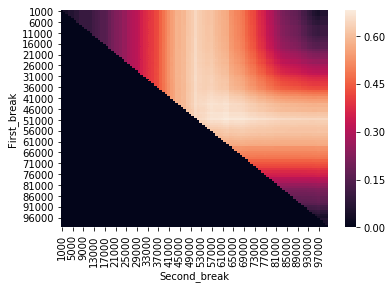

In [49]:
import numpy as np; np.random.seed(0)
import seaborn as sns
ax = sns.heatmap(hh)

Second_break,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,...,91000,92000,93000,94000,95000,96000,97000,98000,99000,100000
First_break,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0449,0.0449,0.0636,0.0636,0.0779,0.0779,0.1008,0.1008,0.1008,...,0.1302,0.1224,0.0959,0.0858,0.0633,0.0517,0.0449,0.0633,0.0633,0.0633
2000,0.0,0.0000,0.0449,0.0636,0.0636,0.0779,0.0779,0.1008,0.1008,0.1008,...,0.1302,0.1224,0.0959,0.0858,0.0633,0.0517,0.0449,0.0633,0.0633,0.0633
3000,0.0,0.0000,0.0000,0.0636,0.0636,0.0779,0.0779,0.1008,0.1008,0.1008,...,0.1302,0.1224,0.0959,0.0858,0.0633,0.0517,0.0449,0.0633,0.0633,0.0633
4000,0.0,0.0000,0.0000,0.0000,0.0636,0.0779,0.0779,0.1008,0.1008,0.1008,...,0.1375,0.1301,0.1057,0.0967,0.0775,0.0685,0.0636,0.0776,0.0776,0.0776
5000,0.0,0.0000,0.0000,0.0000,0.0000,0.0779,0.0779,0.1008,0.1008,0.1008,...,0.1375,0.1301,0.1057,0.0967,0.0775,0.0685,0.0636,0.0776,0.0776,0.0776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0447,0.0447,0.0447,0.0447
97000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0633,0.0633,0.0633
98000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0447,0.0447


In [43]:
hh = pd.DataFrame(arr)

In [44]:
hh['First_break'] = (hh.index+1)*1000

In [45]:
hh = hh.set_index('First_break').transpose()

In [46]:
hh['Second_break']= (hh.index+1)*1000

In [47]:
hh = hh.set_index('Second_break').transpose()

In [ ]:
#flights = sns.load_dataset("flights")
#flights = flights.pivot("month", "year", "passengers")

ax = sns.heatmap(hh,annot=True)

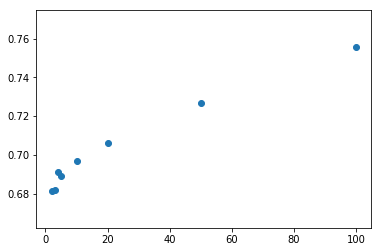

In [6]:
CramerVs = [-tpe_trials_conatiner[i].best_trial['result']['loss'] for i in range(0, len(breaks))]
plt.scatter(breaks,CramerVs)
plt.show()

In [10]:
df['Salary'].min()
df['Salary'].max()

100000.0

Ran for each number of breaks [2,3,4,5,10,20,50,100] 1000 trials to maximise the correlation metric CramerV and in finding the optimum breaks in discretizing/binning the 'Salary'-variable.
Note: the number of bins is determined by simply 'number of breaks + 1'. 
With number of breaks the correlation metric CramerV increased slightly as well.

# Chi-square-test and CramerV for the different solver-solutions
The split for the different number of breaks becomes more and more a visual "V" in the bar-chart with having one category on the one side and the other category on the opposite side.  

In [6]:
myAnalyser = Analyser.Analyser()

# Categorising having 3 bins

Splitting at: [38739, 62690]


,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,201.0135
1,p-value =,0.0000
2,Cramer's V =,0.6347


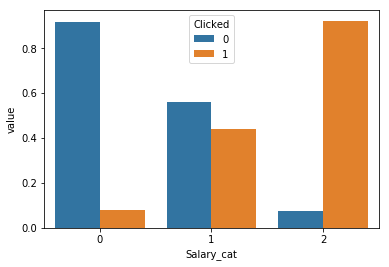

In [26]:
bins = [int(tpe_best_container[1][str(i)]) for i in range(0, breaks[0])]
bins.sort()
print("Splitting at:", bins)
df['Salary_cat'] = np.digitize(df['Salary'], bins)
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'])[16]

# Categorising having 4 bins

Splitting at: [38739, 51288, 62690]


,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,235.4205
1,p-value =,0.0000
2,Cramer's V =,0.6869


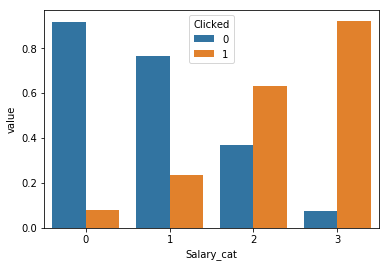

In [24]:
bins = [int(tpe_best_container[1][str(i)]) for i in range(0, breaks[1])]
bins.sort()
print("Splitting at:", bins)
df['Salary_cat'] = np.digitize(df['Salary'], bins)
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'])[16]

# Categorising having 5 bins

Splitting at: [43160, 51319, 57027, 69794]


,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,236.5830
1,p-value =,0.0000
2,Cramer's V =,0.6886


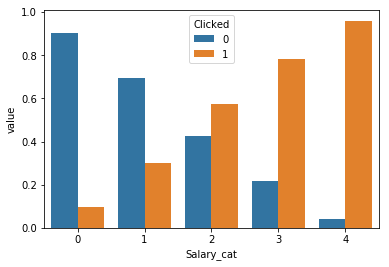

In [28]:
bins = [int(tpe_best_container[2][str(i)]) for i in range(0, breaks[2])]
bins.sort()
print("Splitting at:", bins)
df['Salary_cat'] = np.digitize(df['Salary'], bins)
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'])[16]

# Categorising having 6 bins

Splitting at: [30955, 42595, 51432, 58303, 71367]


,Chi-square test,results
0,Pearson Chi-square ( 5.0) =,236.5952
1,p-value =,0.0000
2,Cramer's V =,0.6886


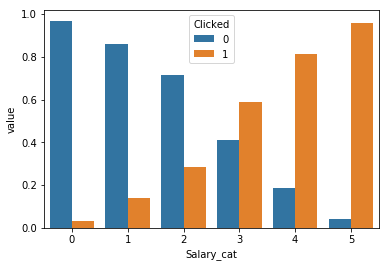

In [29]:
bins = [int(tpe_best_container[3][str(i)]) for i in range(0, breaks[3])]
bins.sort()
print("Splitting at:", bins)
df['Salary_cat'] = np.digitize(df['Salary'], bins)
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'])[16]

# Categorising having 11 bins

,Chi-square test,results
0,Pearson Chi-square ( 10.0) =,241.8040
1,p-value =,0.0000
2,Cramer's V =,0.6961


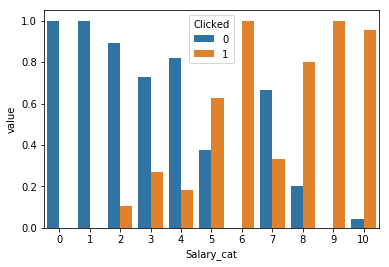

In [74]:
bins = [int(tpe_best_container[4][str(i)]) for i in range(0, breaks[4])]
bins.sort()
#print("Splitting at:", bins)
df['Salary_cat'] = np.digitize(df['Salary'], bins)
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'],11)[16]

# Categorising having 21 bins

,Chi-square test,results
0,Pearson Chi-square ( 19.0) =,249.7842
1,p-value =,0.0000
2,Cramer's V =,0.7075


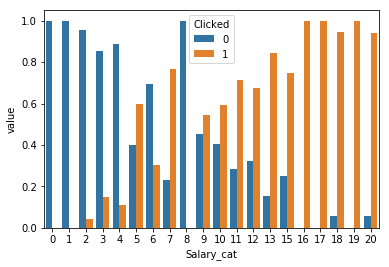

In [73]:
bins = [int(tpe_best_container[5][str(i)]) for i in range(0, breaks[5])]
bins.sort()
#print("Splitting at:", bins)
df['Salary_cat'] = np.digitize(df['Salary'], bins)
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'],21)[16]

# Categorising having 51 bins

,Chi-square test,results
0,Pearson Chi-square ( 46.0) =,262.2821
1,p-value =,0.0000
2,Cramer's V =,0.7250


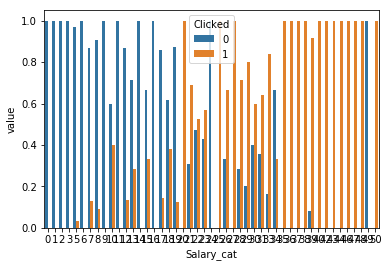

In [72]:
bins = [int(tpe_best_container[6][str(i)]) for i in range(0, breaks[6])]
bins.sort()
#print("Splitting at:", bins)
df['Salary_cat'] = np.digitize(df['Salary'], bins)
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'],51)[16]

# Categorising having 101 bins

,Chi-square test,results
0,Pearson Chi-square ( 81.0) =,283.7121
1,p-value =,0.0000
2,Cramer's V =,0.7540


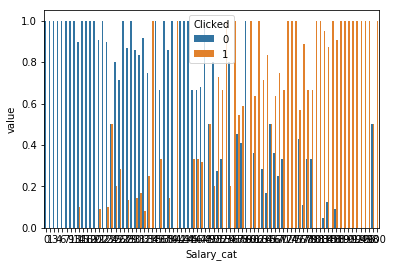

In [71]:
bins = [int(tpe_best_container[7][str(i)]) for i in range(0, breaks[7])]
bins.sort()
#print("Splitting at:", bins)
df['Salary_cat'] = np.digitize(df['Salary'], bins)
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'],101)[16]